In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [69]:
data=pd.read_csv('IRIS.csv')

In [70]:
data.shape

(150, 5)

In [71]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [75]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

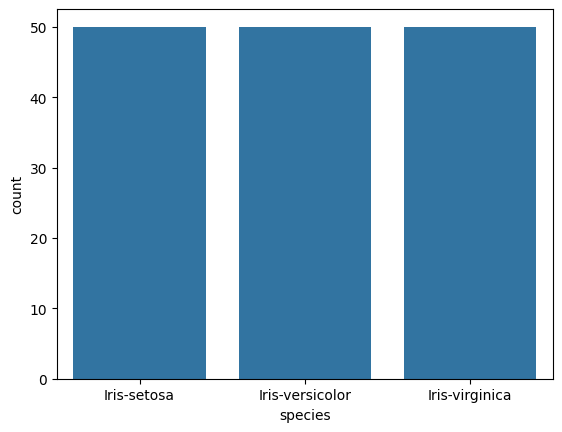

In [76]:
#data visulaization
sns.countplot(x=data['species'],data=data)
plt.show()

In [77]:
data['sepal_length'].value_counts().head(10)

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
Name: count, dtype: int64

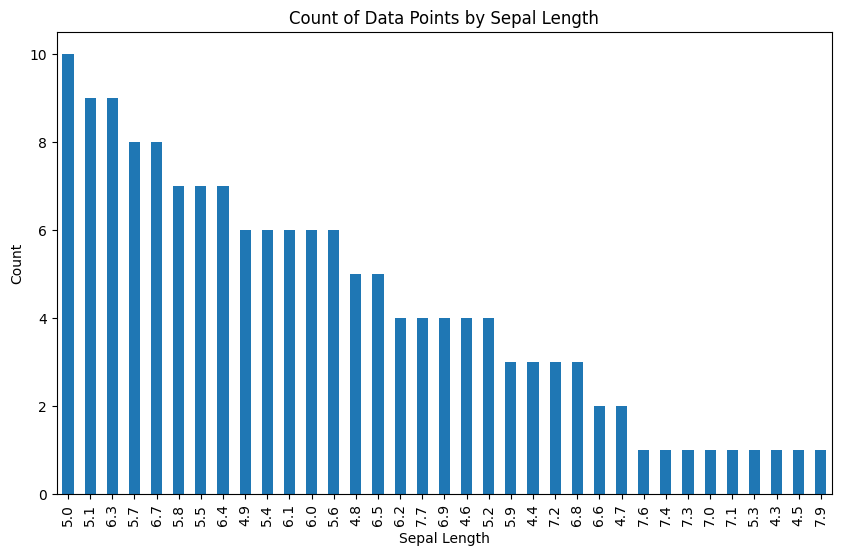

In [78]:
plt.figure(figsize=(10, 6))
data['sepal_length'].value_counts().plot(kind='bar')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Count of Data Points by Sepal Length')
plt.show()


In [79]:
data['sepal_width'].value_counts().head(10)

sepal_width
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
Name: count, dtype: int64

In [80]:
#scatterplots
color=['green','blue','red']
specie=['Iris-virginica','Iris-versicolor','Iris-setosa']

In [81]:
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


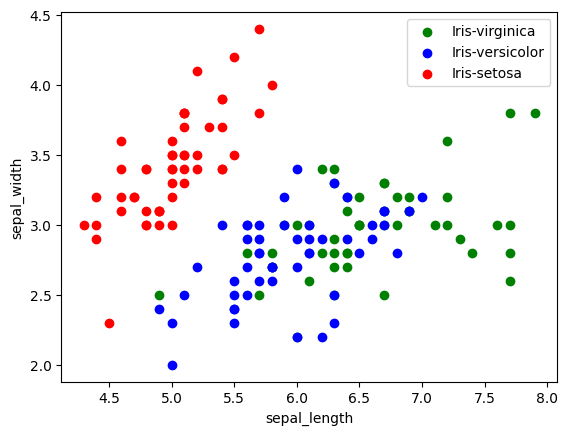

In [82]:
for i in range(3):
  x=data[data['species'] == specie[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=color[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

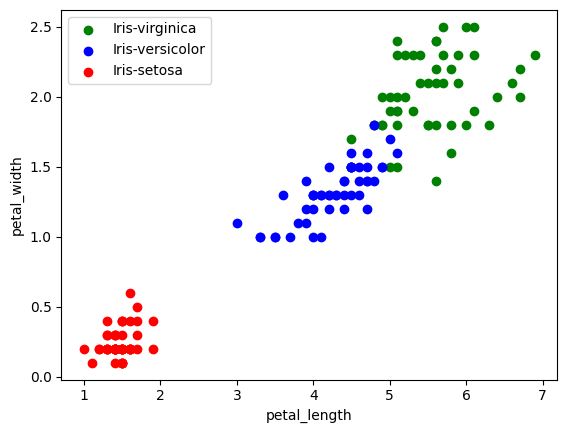

In [83]:
#the classes can be seperated esily with this.
for i in range(3):
  x=data[data['species'] == specie[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=color[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

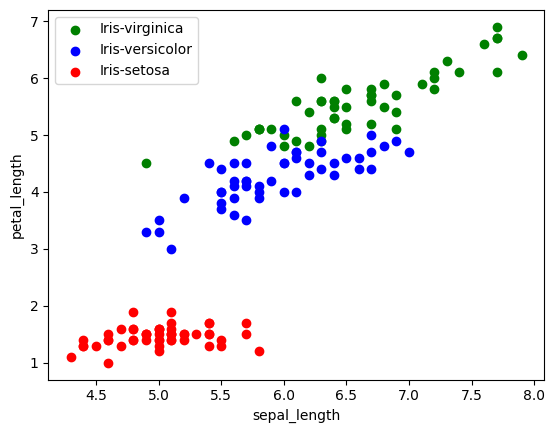

In [84]:
for i in range(3):
  x=data[data['species'] == specie[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=color[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

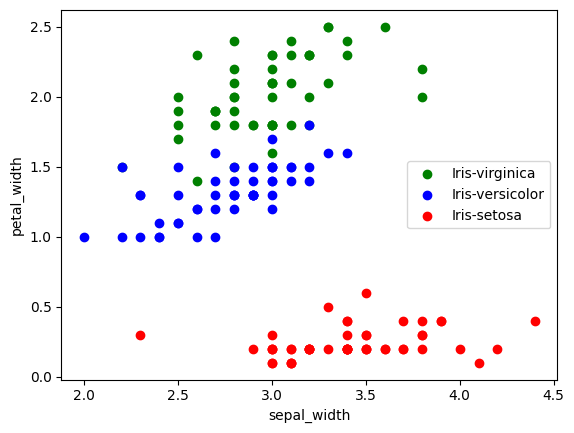

In [85]:
for i in range(3):
  x=data[data['species'] == specie[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=color[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

In [87]:
numeric_columns = data.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

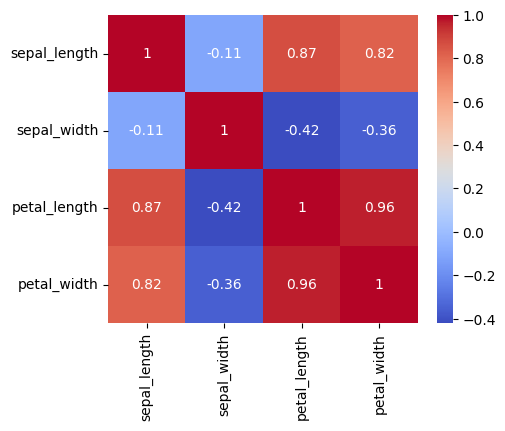

In [89]:
#heatmap
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax,cmap='coolwarm')

In [91]:
#label Encoder
from operator import le
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [94]:
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
#model-training
X=data.drop(columns=['species'])
Y=data['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [96]:
model=LogisticRegression()

In [97]:
#to train the model
model.fit(X_train,Y_train)

LogisticRegression()

In [98]:
print("Accuracy: ",model.score(X_test,Y_test))

Accuracy:  0.9666666666666667
